<a href="https://colab.research.google.com/github/Guliko24/NetZoo_network/blob/main/GRN_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# This is a block of code working with single files from MCF7 and MDA-MB-231 cell lines



In [1]:
#import all the packages as needed
import pandas as pd
import networkx as nx

In [2]:
# prompt: let's load Gdrive onto notebook

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Navigate to your Google Drive files
%cd /content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets


/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets


#let's convert CTCF-genes file into some adjancy matrix for future use

---


In [4]:
# Load the CSV file into a DataFrame
df_MCF7 = pd.read_csv('/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_CTCF_targets_edges.csv')
df_MCF7_all_TF=pd.read_csv('/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_TF_genes_weighted_nodes150.csv')
# Display the DataFrame
print(df_MCF7)
print(df_MCF7_all_TF)

    Source  Target  Edge weight
0     CTCF   NACAD    12.263211
1     CTCF     AMT    11.245753
2     CTCF   TTC27    10.059604
3     CTCF    XYLB     9.888435
4     CTCF   THTPA     7.854461
..     ...     ...          ...
145   CTCF     CTH     3.792667
146   CTCF   CENPK     3.790138
147   CTCF  B3GAT1     3.775499
148   CTCF   REXO1     3.772165
149   CTCF   GPR20     3.765080

[150 rows x 3 columns]
      Source Target  Edge weight
0       IRX6  MEOX2    64.130060
1       IRX4  MEOX2    63.920394
2       IRX6   FIGN    60.464314
3       IRX4   FIGN    60.087284
4     ZNF180  TTC27    59.879850
..       ...    ...          ...
145   ZNF235  TTC27    32.200000
146  CREB3L2   FIGN    32.199281
147   LIN28A   FIGN    32.102345
148  CREB3L1   FIGN    32.045289
149     ETV5  MEOX2    31.962014

[150 rows x 3 columns]


In [5]:
# Pivot the data to create the adjacency matrix
adjacency_matrix_MCF7= df_MCF7.pivot(index='Source', columns='Target', values='Edge weight').fillna(0)

# Display the adjacency matrix
print(adjacency_matrix_MCF7)


Target     ACKR3    ADGRF2        AMT    APPBP2  ARHGAP35      ASNS     ATMIN  \
Source                                                                          
CTCF    6.194519  5.257484  11.245753  3.807179  5.737962  3.924574  3.903627   

Target   B3GALT6    B3GAT1    BRICD5  ...     WDR18     WDR33     WDR38  \
Source                                ...                                 
CTCF    3.844181  3.775499  4.419022  ...  4.558751  4.904655  5.150136   

Target     WDR55      XYLB    ZBTB8B     ZG16B    ZNF250    ZNF736    ZNF75A  
Source                                                                        
CTCF    3.855257  9.888435  3.848419  3.909762  3.925584  5.928496  4.052673  

[1 rows x 150 columns]


In [7]:
# Create a directed graph with weights directly from the edge list
G = nx.from_pandas_edgelist(df_MCF7, source='Source', target='Target', edge_attr='Edge weight', create_using=nx.DiGraph())

# Check the graph's nodes and edges
print("Nodes:", G.nodes())
print("Edges:", G.edges(data=True))

Nodes: ['CTCF', 'NACAD', 'AMT', 'TTC27', 'XYLB', 'THTPA', 'PLEKHG2', 'DTL', 'NTM', 'CDRT15L2', 'RFC1', 'POM121L2', 'ACKR3', 'CNDP1', 'UVRAG', 'TMEM106C', 'MPZL3', 'ZNF736', 'KLHL35', 'ELF3', 'ARHGAP35', 'MATK', 'INMT', 'MECP2', 'SNX5', 'NAGK', 'CDRT15', 'PRMT7', 'SLC19A1', 'ADGRF2', 'PEX14', 'MTERF1', 'WDR38', 'EXOC3', 'GALNT14', 'DNAJA2', 'CLDN5', 'RNF141', 'IDI1', 'PROZ', 'WDR33', 'EHD4', 'FCHSD2', 'SIRPB1', 'C1QTNF9', 'CLUL1', 'CIDEB', 'LCK', 'MYT1', 'RPL32', 'WDR18', 'TPRA1', 'IRF9', 'C4orf46', 'RANBP1', 'PYCARD', 'CCDC103', 'DDX5', 'TNKS1BP1', 'PDCD2', 'ITPK1', 'CRYBG3', 'BRICD5', 'FAM76B', 'SSR4', 'TMC7', 'PGAM5', 'DOK3', 'MMP28', 'CHST7', 'HGD', 'CCAR2', 'MYDGF', 'CAPRIN2', 'GGTLC1', 'TUSC2', 'TNFRSF14', 'ERI1', 'SMIM5', 'CCS', 'JMJD4', 'CDK10', 'CRYAA', 'SPR', 'RHBG', 'KIF18B', 'PCSK6', 'IFIT1', 'STUB1', 'MRGPRF', 'GPT', 'SPOCD1', 'PTPRE', 'SLBP', 'HCLS1', 'SOWAHB', 'GATA2', 'NUP88', 'RECQL5', 'TTC31', 'GSTT4', 'ICMT', 'GGT1', 'MPDU1', 'COMT', 'ZNF75A', 'MAML1', 'VBP1', 'RAB32'

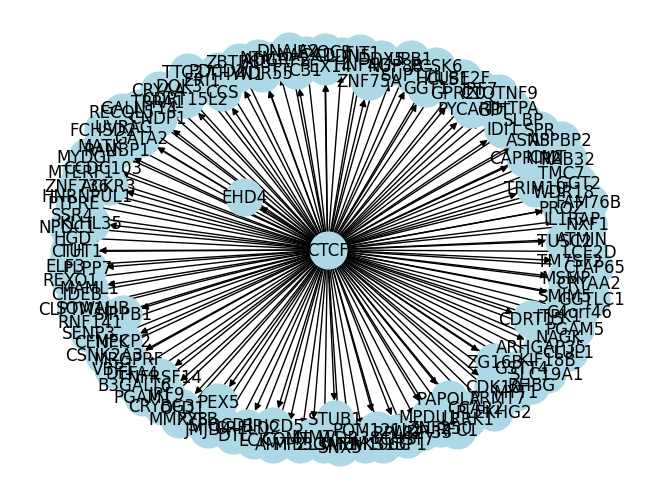

In [8]:
import matplotlib.pyplot as plt

# Set a layout for the graph
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue")

# Draw edge labels to show weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()


In [9]:
#let's try running another file with TF-genes


In [10]:
# Create a directed graph with weights directly from the edge list
G = nx.from_pandas_edgelist(df_MCF7_all_TF, source='Source', target='Target', edge_attr='Edge weight', create_using=nx.DiGraph())

# Check the graph's nodes and edges
print("Nodes:", G.nodes())
print("Edges:", G.edges(data=True))

Nodes: ['IRX6', 'MEOX2', 'IRX4', 'FIGN', 'ZNF180', 'TTC27', 'ZHX1', 'ZNF432', 'ZNF880', 'KDM2B', 'E4F1', 'PRDM9', 'ZBTB7B', 'ZNF383', 'ZNF341', 'ZNF385D', 'SCN1A', 'SIM1', 'GMEB1', 'TFDP3', 'NPAS1', 'NPAS3', 'CREM', 'SIM2', 'ATF6', 'ZNF287', 'NAIF1', 'HIF3A', 'EPAS1', 'ZNF571', 'SIX2', 'FOXK1', 'ZNF529', 'BARHL2', 'GMEB2', 'PODN', 'ZNF774', 'OVOL2', 'ZNF784', 'ZBTB2', 'RUNX2', 'ZNF792', 'XBP1', 'SIX4', 'MYBL2', 'ZNF846', 'NR5A2', 'TERF2', 'MTRNR2L1', 'HOXB1', 'MLX', 'PAX3', 'ZNF467', 'NKX6-2', 'PAX9', 'PROX2', 'ASCL2', 'FOXN2', 'ZNF444', 'RAB40A', 'ZNF501', 'ZNF148', 'ZNF283', 'RUNX3', 'ZNF71', 'CREB3L4', 'CREB3L1', 'IP6K2', 'CREBZF', 'LBX2', 'CREBL2', 'HOXA4', 'HIF1A', 'LHX8', 'NANOG', 'PAX8', 'ZFP57', 'LIN28A', 'HOXA2', 'ZBTB32', 'ZNF484', 'NFYA', 'PRSS3', 'TET1', 'SMAD5', 'KCNE1B', 'ETV5', 'TBX3', 'PROX1', 'ZNF263', 'CREB3L2', 'PAX1', 'LIN28B', 'LHX6', 'RFX6', 'ARNT', 'ARNTL2', 'ZNF267', 'HOXC11', 'HOXA5', 'ZNF304', 'ZNF235']
Edges: [('IRX6', 'MEOX2', {'Edge weight': 64.13006049}), 

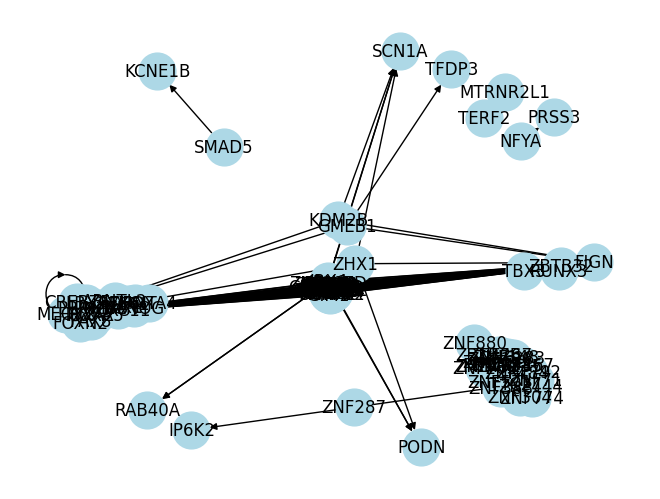

In [11]:
import matplotlib.pyplot as plt

# Set a layout for the graph
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue")

# Draw edge labels to show weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()


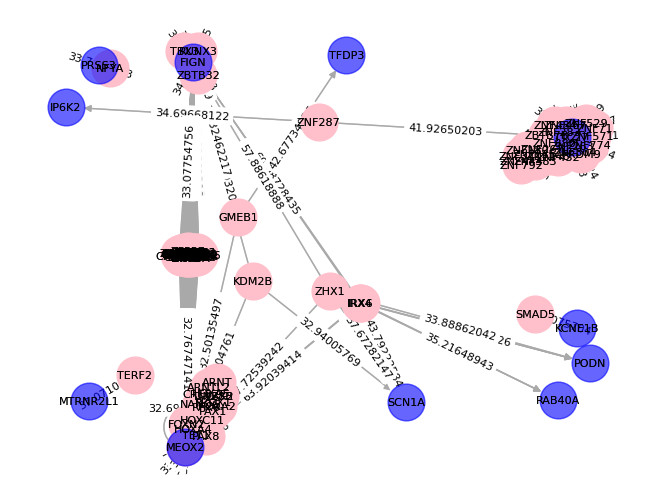

In [12]:
import matplotlib.pyplot as plt
import networkx as nx

# Set a layout for the graph
pos = nx.spring_layout(G)

# Separate the nodes into "Source" and "Target"
source_nodes = set(df_MCF7_all_TF['Source'])
target_nodes = set(df_MCF7_all_TF['Target'])

# Draw the source nodes in pink
nx.draw(G, pos, with_labels=True, node_size=700, nodelist=source_nodes, node_color="pink", font_size=8, edge_color='darkgrey')

# Draw the target nodes in blue, without overriding the previously drawn source nodes
nx.draw(G, pos, with_labels=True, node_size=700, nodelist=target_nodes, node_color="blue", alpha=0.6, font_size=8, edge_color='darkgrey')

# Draw edge labels to show weights with smaller font size
edge_labels = nx.get_edge_attributes(G, 'Edge weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Show the plot
plt.show()


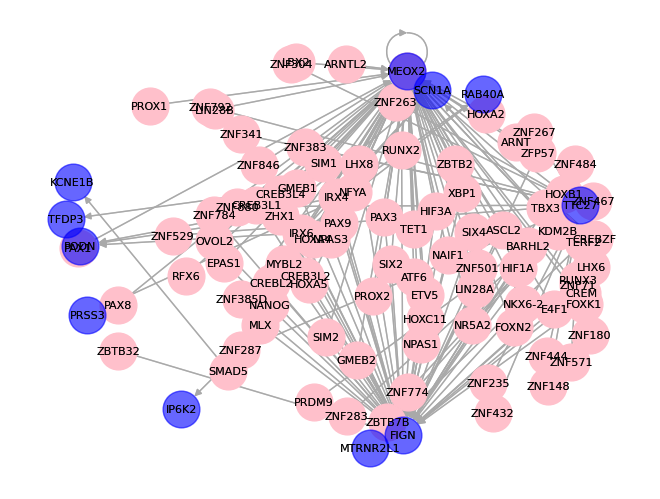

In [16]:
import matplotlib.pyplot as plt
import networkx as nx

# Set a layout for the graph, using edge weights to influence node positioning
pos = nx.spring_layout(G, k=0.8, iterations=50)  # 'weight' parameter will consider edge weights

# Separate the nodes into "Source" and "Target"
source_nodes = set(df_MCF7_all_TF['Source'])
target_nodes = set(df_MCF7_all_TF['Target'])

# Draw the source nodes in pink
nx.draw(G, pos, with_labels=True, node_size=700, nodelist=source_nodes, node_color="pink", font_size=8, edge_color='darkgrey')

# Draw the target nodes in blue, without overriding the previously drawn source nodes
nx.draw(G, pos, with_labels=True, node_size=700, nodelist=target_nodes, node_color="blue", alpha=0.6, font_size=8, edge_color='darkgrey')

# Draw edge labels to show weights with smaller font size
edge_labels = nx.get_edge_attributes(G, 'Edge weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Show the plot
plt.show()
